# Second way of EDA and ML modeling on IRIS dataset

In [1]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Removing unneeded column
iris.drop("Id", axis=1, inplace = True)

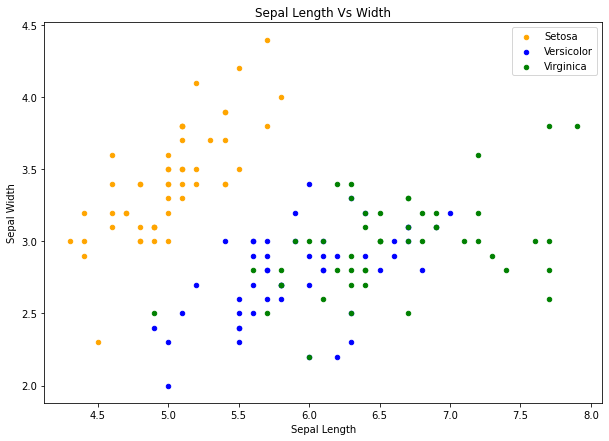

In [7]:
# Some EDA with Iris
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


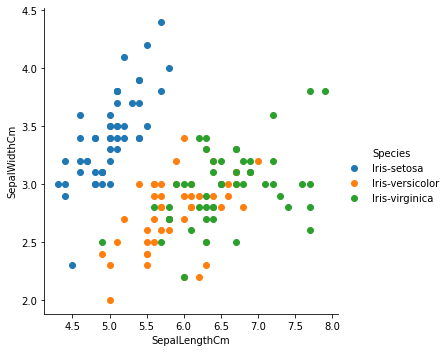

In [8]:
sb.FacetGrid(iris, hue='Species', size=5)\
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
   .add_legend()

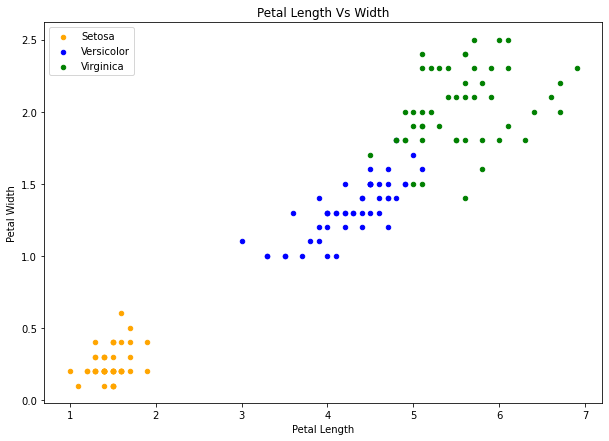

In [9]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

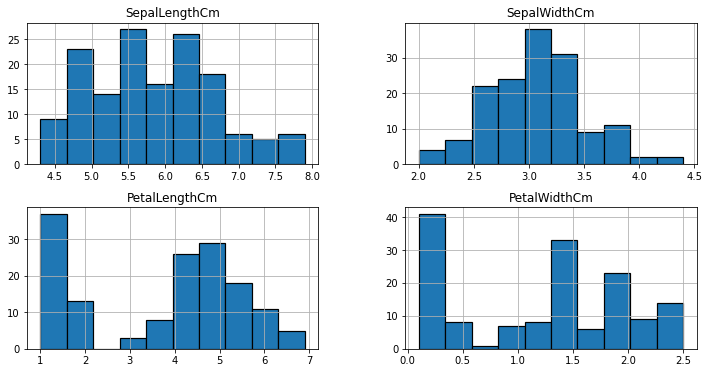

In [10]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

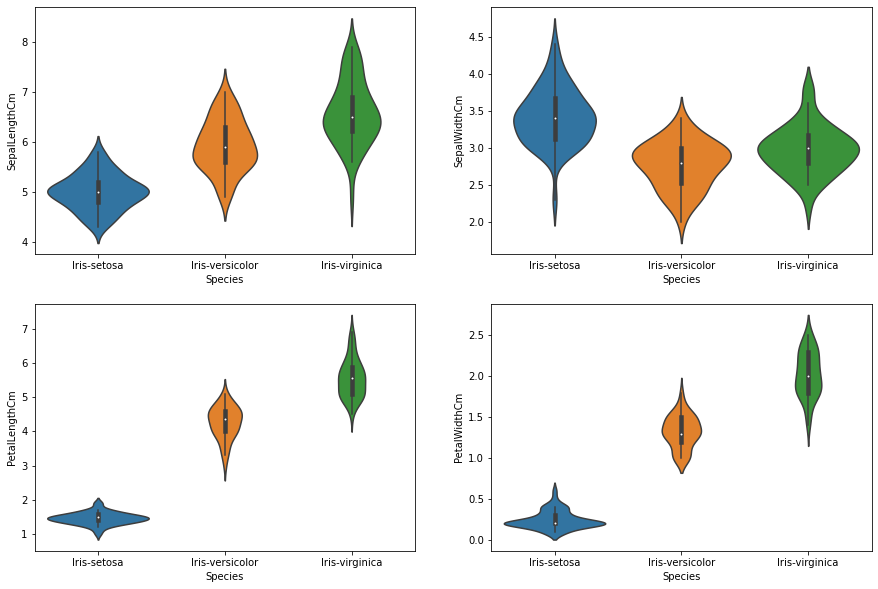

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sb.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sb.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sb.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sb.violinplot(x='Species', y = 'PetalWidthCm', data=iris)

Now the given problem is a classification problem. Thus we will be using the classification algorithms to build a model.

Classification: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

Regression: If the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

In [12]:
# importing all the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for Suport Vector Machine
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [13]:
iris.shape

(150, 5)

Now, when we train any algorithm, the number of features and their correlation plays an important role.
If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy.
Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

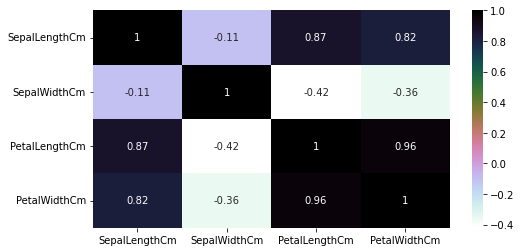

In [14]:
plt.figure(figsize=(8,4))
sb.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

### Observation:

#### The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated We will use all the features for training the algorithm and check the accuracy.
#### Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated.
#### Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

### Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
### Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
### We then check the accuracy by passing the predicted outcome and the actual output to the model.

### Splitting the Data into Training And Testing dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(iris, test_size=0.3) # the attribute test_size=0.3 splits the data into 70% (training) and 30% (testing) ratio
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [17]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking testing data feature
test_y = test.Species # output value of the test data

In [18]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
43,5.0,3.5,1.6,0.6
51,6.4,3.2,4.5,1.5
134,6.1,2.6,5.6,1.4
53,5.5,2.3,4.0,1.3
100,6.3,3.3,6.0,2.5


In [19]:
train_X.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
70,5.9,3.2,4.8,1.8
59,5.2,2.7,3.9,1.4
41,4.5,2.3,1.3,0.3
117,7.7,3.8,6.7,2.2
81,5.5,2.4,3.7,1.0


In [20]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
21,5.1,3.7,1.5,0.4
127,6.1,3.0,4.9,1.8
3,4.6,3.1,1.5,0.2
124,6.7,3.3,5.7,2.1
97,6.2,2.9,4.3,1.3


In [21]:
test_X.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
5,5.4,3.9,1.7,0.4
2,4.7,3.2,1.3,0.2
56,6.3,3.3,4.7,1.6
111,6.4,2.7,5.3,1.9


In [22]:
train_y.head()

43         Iris-setosa
51     Iris-versicolor
134     Iris-virginica
53     Iris-versicolor
100     Iris-virginica
Name: Species, dtype: object

In [23]:
train_y.tail()

70     Iris-versicolor
59     Iris-versicolor
41         Iris-setosa
117     Iris-virginica
81     Iris-versicolor
Name: Species, dtype: object

# Support Vector Machine SVM

In [24]:
model = svm.SVC() # select the SVM algorithm

model.fit(train_X, train_y) # train the algorithm with training data and training output
prediction = model.predict(test_X) # pass the testing data to the stored algorithm to predict the outcome
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # checks the accuracy of the algorithm

The accuracy of the SVM is:  0.9777777777777777


# Logistic Regression

In [25]:
model = LogisticRegression() # select the Logistic Regression algorithm
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9777777777777777


# Decision Tree

In [26]:
model = DecisionTreeClassifier() # select the Decision Tree algorithm
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9777777777777777


# K-Nearest Neighbors

In [27]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9777777777777777


### Let's check the accuracy for various values of n for K-Nearest nerighbours

C:\Users\quant\AppData\Local\Temp\ipykernel_4784\2764753431.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()
C:\Users\quant\AppData\Local\Temp\ipykernel_4784\2764753431.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
C:\Users\quant\AppData\Local\Temp\ipykernel_4784\2764753431.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
C:\Users\quant\AppData\Local\Temp\ipykernel_4784\2764753431.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(

([<matplotlib.axis.XTick at 0x16af5502cd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

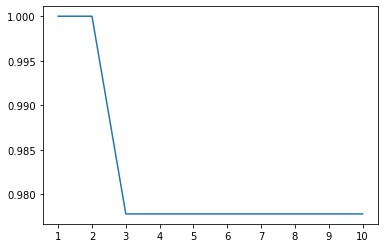

In [28]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

### Creating Petals and Sepals Training data

In [29]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

### For Iris Petal

In [30]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) # petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

### For Iris Sepal

In [31]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) # sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

# SVM Algorithm

In [32]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) # petals
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) # sepals
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


# Logistic Regression

In [33]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) # petals
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) # sepals
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


# Decision Tree

In [34]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) # petals
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) # sepals
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


# K-Nearest Neighbors

In [35]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) # petals
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) # sepals
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


## Observation:
#### Using Petals over Sepal for training the data gives a much better accuracy.
#### This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.